# Insert the video (Read a  video file from google Drive)

---



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import cv2
import os

# 1. تحميل الفيديو مباشرة من جوجل درايف]
file_id = '1ZAH9zaHEoZtkL3Bh89P6ss5Fjw-ePDv1'
output_file = 'video.mp4'

# التحقق مما إذا كان الملف موجوداً لتجنب التحميل المتكرر
if not os.path.exists(output_file):
    print(" جاري تحميل الفيديو...")
    !gdown --id {file_id} -O {output_file}
else:
    print(" الفيديو موجود مسبقاً.")

# 2. قراءة الفيديو باستخدام OpenCV
cap = cv2.VideoCapture(output_file)

if not cap.isOpened():
    print(" لم يتم فتح الفيديو (تأكد من صلاحية الرابط أو الملف)")
else:
    print(" تم فتح الفيديو بنجاح باستخدام OpenCV")

    # قراءة أول إطار للتأكد
    ret, frame = cap.read()
    if ret:
        print(f" تم قراءة الإطار الأول بنجاح. أبعاد الفيديو: {frame.shape}")

    cap.release()

✅ الفيديو موجود مسبقاً.
✅ تم فتح الفيديو بنجاح باستخدام OpenCV
📷 تم قراءة الإطار الأول بنجاح. أبعاد الفيديو: (1440, 2560, 3)


# install the OpenCv Library


In [3]:
!pip install opencv-python


# Install a ready-made and pre-trained ResNet50 template on ImageNet and use it for classification.

In [4]:
import torch
import torchvision.models as models
model = models.resnet50(weights="IMAGENET1K_V1")
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

# open video file
Load and read the video using Python (OpenCV).


In [5]:
import cv2
from google.colab import files
import os # لادارة الملفات داخل المجلد

video_path = "video.mp4"  # تحديد مكان ملف الفيديو

cap = cv2.VideoCapture(video_path)  #فتح الفيديو

if not cap.isOpened():    # التناكد من انه تم فتح الفيديو بنجاح
    print("لم يتمكن الكود من فتح ملف الفيديو، تأكد من الاسم كما هو بعد الرفع.")
else:
    print(" تم فتح الفيديو بنجاح.")


cap.release()

 تم فتح الفيديو بنجاح.


# Create a folder to save the frames (images) before starting to extract them from the video

In [6]:
frames_dir = "frames"

# إنشاء مجلد للإطارات إذا لم يكن موجوداً
if not os.path.exists(frames_dir):
    os.makedirs(frames_dir)

print("  حفظ الإطارات في المجلد:", frames_dir)

  حفظ الإطارات في المجلد: frames


# Watch the video frame by frame and select one frame every 10 frames , then save them as JPG images.

In [7]:
video_path = "video.mp4"   # المسار الصحيح الكامل

cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print(" لم يتم فتح الفيديو. تأكد من الاسم.")
else:
    frame_index = 0           # عدّاد لكل إطار في الفيديو
    save_every_n_frames = 10  # احفظ إطارًا واحدًا كل 10 إطارات
    saved_frames_count = 0    # عدّاد الإطارات التي تم حفظها فعليا

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        if frame_index % save_every_n_frames == 0:
            frame_filename = os.path.join(frames_dir, f"frame_{frame_index:05d}.jpg") # حفظ الإطار المحدد كصورة JPG
            cv2.imwrite(frame_filename, frame)                                        # الحفظ في ملف ال frames
            saved_frames_count += 1

        frame_index += 1

    cap.release()
    print(" تم الانتهاء من قراءة الفيديو.")
    print(" عدد الإطارات التي تم حفظها:", saved_frames_count)

 تم الانتهاء من قراءة الفيديو.
 عدد الإطارات التي تم حفظها: 128


# Display one of the images (frames) extracted from the video to verify that the process was done correctly.

 عدد ملفات الإطارات في المجلد: 128


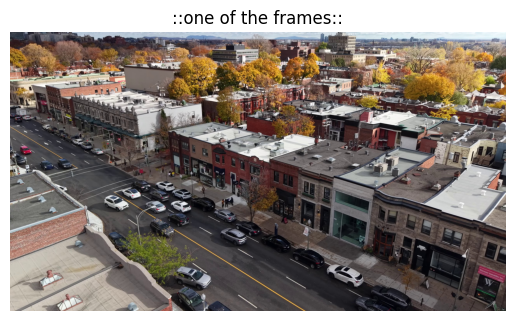

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # لعرض الصور

frames_list = sorted(os.listdir(frames_dir)) # حفظ جميع الملفات داخل المجلد الذي تم انشاءه بالترتيب

print(" عدد ملفات الإطارات في المجلد:", len(frames_list)) # طباعة عدد الاطارات التي تم  استخراجها

if len(frames_list) > 0:
  # عرض اول صورة او اطار تم استخراجه
    sample_frame_path = os.path.join(frames_dir, frames_list[0])
    img = mpimg.imread(sample_frame_path)

    plt.imshow(img)
    plt.axis('off')
    plt.title("::one of the frames::")
    plt.show()
else:
    print("لا توجد إطارات داخل مجلد frames.")


# Install the ResNet Model from PyTorch, which is already trained on ImageNet, for frame classification. It also prepares the image for preprocessing (resizing, tensor conversion, and normalization) before inputting it into the template.

In [9]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import numpy as np


# 1) تحميل نموذج ResNet50 مدرَّب على ImageNet
resnet = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V1)
resnet.eval()  # وضع النموذج في وضع التقييم

print("تم تحميل نموذج ResNet50 بنجاح.")

# 2) تجهيز التحويلات المطلوبة للإطار قبل إدخاله للنموذج
#   - تغيير الحجم
#   - تحويل إلى Tensor
#   - Normalization بالقيم المستخدمة في ImageNet
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),                # تغيير الحجم
    transforms.ToTensor(),                        # تحويل إلى Tensor
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],               # قيم ImageNet
        std=[0.229, 0.224, 0.225]
    )
])

print(" تم تجهيز دالة المعالجة المسبقة للإطارات.")


تم تحميل نموذج ResNet50 بنجاح.
 تم تجهيز دالة المعالجة المسبقة للإطارات.


# It allows converting ResNet output from numbers to the names of real objects such as:
car, building, dock, streetcar, container ship

In [10]:
import json
import urllib.request

# رابط رسمي لملف mapping بين الأرقام والأسماء في ImageNet
url = "https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt"

# تنزيل الملف وتخزينه محلياً
urllib.request.urlretrieve(url, "imagenet_classes.txt")

# قراءة الأسماء في قائمة
with open("imagenet_classes.txt", "r") as f:
    imagenet_labels = [line.strip() for line in f.readlines()]

print("تم تحميل أسماء فئات ImageNet. عدد الفئات:", len(imagenet_labels))
print("مثال على بعض الفئات:", imagenet_labels[:5])


تم تحميل أسماء فئات ImageNet. عدد الفئات: 1000
مثال على بعض الفئات: ['tench', 'goldfish', 'great white shark', 'tiger shark', 'hammerhead']


# It is for actually performing the classification process on a single frame and returning the name of the object that the model expects to appear in the image.

In [11]:
# اختيار أول إطار من المجلد frames
frames_dir = "frames"
frames_list = sorted(os.listdir(frames_dir))

sample_frame_path = os.path.join(frames_dir, frames_list[0])
print(" نجرب على الإطار:", sample_frame_path)

# 1) فتح الصورة باستخدام PIL
img = Image.open(sample_frame_path).convert("RGB")

# 2) تطبيق التحويلات
input_tensor = preprocess(img)
input_batch = input_tensor.unsqueeze(0)  # إضافة بُعد للباتش (1, C, H, W)

# 3) تمرير الصورة للنموذج
with torch.no_grad():
    outputs = resnet(input_batch)

# 4) الحصول على أعلى صنف متوقّع
probabilities = torch.nn.functional.softmax(outputs[0], dim=0)
top_prob, top_catid = torch.topk(probabilities, 1)

predicted_label = imagenet_labels[top_catid[0]]
print(f"التنبؤ الأعلى: {predicted_label} (احتمال {top_prob[0].item():.4f})")


 نجرب على الإطار: frames/frame_00000.jpg
التنبؤ الأعلى: streetcar (احتمال 0.1393)


# loads each frame, within the frames folder and passes it to a ResNet model to classify its content using ImageNet data. It then compiles the results into a table containing the frame name, predicted classification, and confidence level, facilitating later video content analysis.

In [12]:
import pandas as pd
from tqdm.auto import tqdm


frames_dir = "frames"
frames_list = sorted(os.listdir(frames_dir))

results = []

print("عدد الإطارات التي سيتم تصنيفها:", len(frames_list))

for frame_name in tqdm(frames_list):
    frame_path = os.path.join(frames_dir, frame_name)

    # فتح الصورة كـ PIL
    img = Image.open(frame_path).convert("RGB")

    # تجهيز الصورة للنموذج
    input_tensor = preprocess(img)
    input_batch = input_tensor.unsqueeze(0)

    # تمريرها للنموذج
    with torch.no_grad():
        outputs = resnet(input_batch)

    # حساب الاحتمالات وأخذ أعلى فئة
    probabilities = torch.nn.functional.softmax(outputs[0], dim=0)
    top_prob, top_catid = torch.topk(probabilities, 1)
    predicted_label = imagenet_labels[top_catid[0]]

    # حفظ النتيجة
    results.append({
        "frame": frame_name,
        "label": predicted_label,
        "probability": float(top_prob[0].item())
    })

# تحويل النتائج إلى DataFrame
df_results = pd.DataFrame(results)

print(" تم تصنيف جميع الإطارات.")
df_results.head()


عدد الإطارات التي سيتم تصنيفها: 128


  0%|          | 0/128 [00:00<?, ?it/s]

 تم تصنيف جميع الإطارات.


,frame,label,probability
0,frame_00000.jpg,streetcar,0.139319
1,frame_00010.jpg,grocery store,0.102122
2,frame_00020.jpg,grocery store,0.154630
3,frame_00030.jpg,grocery store,0.115237
4,frame_00040.jpg,grocery store,0.179178


# Counts the number of times each category appears within the categorized frames, then displays the 10 most prevalent categories in the video

In [13]:
label_counts = df_results["label"].value_counts().head(10)
print("أكثر الفئات تكراراً في الفيديو:")
print(label_counts)


أكثر الفئات تكراراً في الفيديو:
label
container ship    47
grocery store     21
bell cote         12
dock              11
freight car        8
tobacco shop       8
dome               5
streetcar          4
garbage truck      4
racer              3
Name: count, dtype: int64


# Create a graph showing the most frequently occurring categories in the categorized frames, using the top 5 most frequently occurring categories.

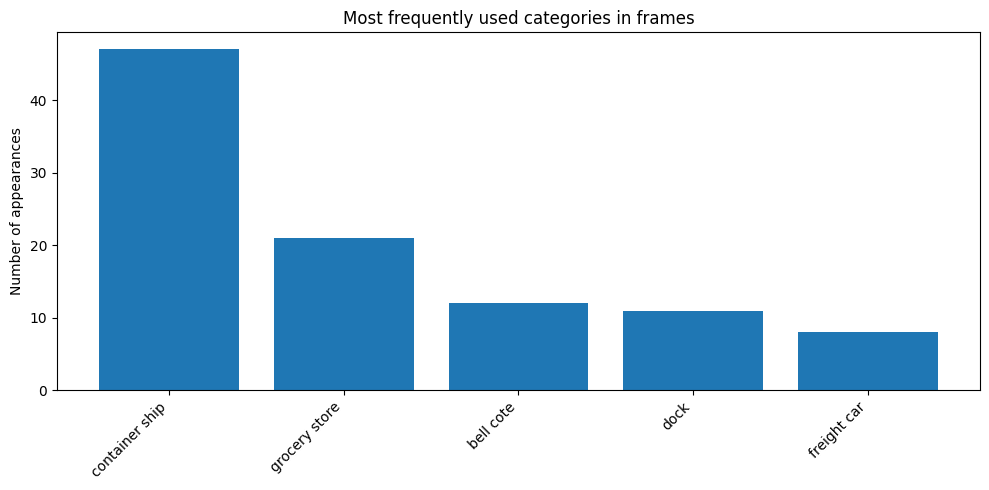

In [14]:

# أخذ أكثر 5 فئات تكراراً
top_n = 5
label_counts = df_results["label"].value_counts().head(top_n)

plt.figure(figsize=(10, 5))
plt.bar(label_counts.index, label_counts.values)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Number of appearances")
plt.title("Most frequently used categories in frames")
plt.tight_layout()
plt.show()

# displays the video frame with the expected title and its probability, with the aim of creating titled images for the report.

In [15]:

def show_frame_with_label(row):
    frame_name = row["frame"]
    label = row["label"]
    prob = row["probability"]

    frame_path = os.path.join(frames_dir, frame_name)
    img = mpimg.imread(frame_path)

    plt.figure(figsize=(6, 4))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"{frame_name}\nLabel: {label} (prob={prob:.2f})")
    plt.show()



# here ill  displays three different Frames from the video (the first frame, a middle frame, and the last frame) with the aim of illustrating how the classification model's predictions change across different stages of the video, and providing visual examples that can be used in the report or in the explanatory video.

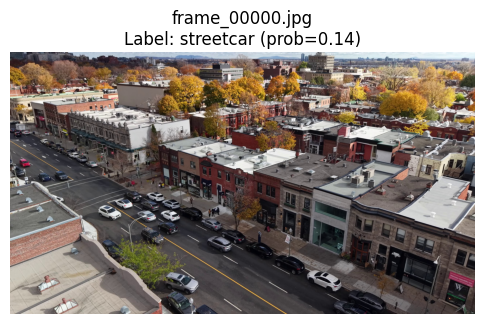

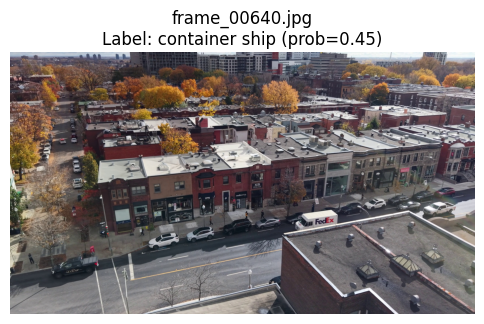

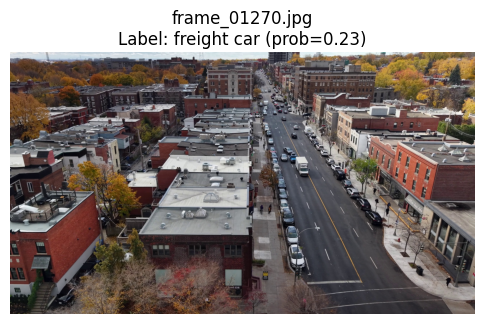

In [16]:
# أول إطار
show_frame_with_label(df_results.iloc[0])

# إطار في المنتصف
mid_index = len(df_results) // 2
show_frame_with_label(df_results.iloc[mid_index])

# آخر إطار
show_frame_with_label(df_results.iloc[-1])


# Now I'll save all frame classification results in a CSV file named video_classification_results.csv, so that they can be referred to later or used within the report. The file contains the name of each frame, the expected label, and its probability in an organized manner.

In [17]:
csv_path = "video_classification_results.csv"
df_results.to_csv(csv_path, index=False)
print(" تم حفظ النتائج في ملف:", csv_path)


 تم حفظ النتائج في ملف: video_classification_results.csv


# Optional Bonus Tasks

## Using object detection instead of classification (YOLO, SSD, Faster R-CNN).

### This code configures and runs the YOLOv model by downloading it and its requirements in Google Colab, ready for use as an object detector alternative to traditional classification. This step allows for the extraction of extraterrestrial objects from each video frame to determine their locations.

In [18]:
# الانتقال إلى مجلد العمل الرئيسي في كولاب
%cd /content

# تنزيل YOLOv من GitHub
!git clone https://github.com/ultralytics/yolov5.git

# الدخول إلى مجلد YOLOv5
%cd /content/yolov5

# تثبيت المتطلبات اللازمة
!pip install -r requirements.txt

# تشغيل كشف الأجسام على جميع الإطارات في مجلد frames
!python detect.py --weights yolov5s.pt --source /content/frames \--project /content/yolo_results --name exp --exist-ok --save-txt --save-conf

yolo_dir = "/content/yolo_results/exp"
print(" يوجد هذا العدد من الصور بعد YOLO:", len(os.listdir(yolo_dir)))
os.listdir(yolo_dir)[:5]  # عرض أول 5 أسماء

/content
fatal: destination path 'yolov5' already exists and is not an empty directory.
/content/yolov5
detect: weights=['yolov5s.pt'], source=/content/frames, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content/yolo_results, name=exp, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-450-g781b9d57 Python-3.12.12 torch-2.9.0+cu126 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
image 1/128 /content/frames/frame_00000.jpg: 384x640 2 persons, 25 cars, 1 bus, 397.0ms
image 2/128 /content/frames/frame_00010.jpg: 384x640 2 persons, 24 cars, 1 bus, 240.6ms
image 3/128 /content/frames/frame_00020.jpg: 384x640 4 persons, 22 cars, 

['frame_01040.jpg',
 'frame_00350.jpg',
 'frame_01010.jpg',
 'frame_00940.jpg',
 'frame_01260.jpg']

## Comparing the performance of two different models

### read YOLOv5 result files (.txt files), extracts the detected objects in each frame, and converts them into a DataFrame table containing the object's ID, trust, and name from the COCO list.

In [19]:
import glob
import pandas as pd
import yaml

labels_dir = "/content/yolo_results/exp/labels"
label_files = glob.glob(os.path.join(labels_dir, "*.txt"))

yolo_rows = []

for lf in label_files:
    frame_name = os.path.basename(lf).replace(".txt", ".jpg")
    with open(lf, "r") as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) < 6:
                continue
            cls_id, x_c, y_c, w, h, conf = map(float, parts)
            yolo_rows.append({
                "frame": frame_name,
                "class_id": int(cls_id),
                "confidence": conf
            })

df_yolo = pd.DataFrame(yolo_rows)

# تحميل أسماء COCO
with open("data/coco128.yaml", "r") as f:
    coco_data = yaml.safe_load(f)

coco_names = coco_data["names"]
df_yolo["label"] = df_yolo["class_id"].map(coco_names)

df_yolo.head()

,frame,class_id,confidence,label
0,frame_00700.jpg,2,0.259418,car
1,frame_00700.jpg,0,0.261038,person
2,frame_00700.jpg,2,0.261891,car
3,frame_00700.jpg,2,0.283632,car
4,frame_00700.jpg,2,0.285528,car


###  displays the most frequently occurring classes predicted by the ResNet50 model across frames, and then displays the most frequently detected objects by YOLOv5. In doing so, it provides a direct comparison between scene classification (ResNet) and real-time object detection within the frame (YOLO).

In [20]:
print("Top ResNet labels:")
print(df_results["label"].value_counts().head(5), "\n")

print("Top YOLO labels:")
print(df_yolo["label"].value_counts().head(5))


Top ResNet labels:
label
container ship    47
grocery store     21
bell cote         12
dock              11
freight car        8
Name: count, dtype: int64 

Top YOLO labels:
label
car       5676
person     654
truck      272
bus        134
boat        82
Name: count, dtype: int64


###  END